
# Unit 5.2c: Simple harmonic oscillation -- Runge-Kutta (RK2)


One 2nd-ODE $\to $ Two 1st-ODEs
$$
\frac{d^{2}x}{dt^{2}}=-\omega^{2}x\Rightarrow\begin{cases}
\frac{dx}{dt}=v\\
\frac{dv}{dt}=-\omega^{2}x
\end{cases}
$$
- Thus, in Euler method $K_1$ for $v$ and $x$ are given:
\begin{align*}
K_{1}^{x} & = hv_{n} \\
K_{1}^{v} & =h\left(-\omega^{2}x_{n}\right)
\end{align*}

- $x$ and $v$ at middle point:

$$x_{n+1/2}	=	x_n+\frac{K_{1}^{x}}{2}=x_n+\frac{h}{2}v_n$$

$$v_{n+1/2}	=	v_n+\frac{K_{1}^{v}}{2}=v_n+\frac{h}{2}\left(-\omega^2x_{n}\right)$$

- $f^x$ and $f^v$ at middle point:

$$f_{n+1/2}^{x}=v_{n+1/2}$$

$$f_{n+1/2}^{v}=-\omega^{2}x_{n+1/2}$$

- $x$ and $v$ at new time step $t_{n+1}$

$$x_{n+1}^{RK2}  = x_{n}+ h f^x_{n+1/2} = x_{n}+v_{n}h-\omega^{2}x_{n}\frac{h^{2}}{2}$$

$$v_{n+1}^{RK2}  = v_{n}+ h f^v_{n+1/2} = v_{n}-\omega^{2}x_{n}h-\omega^{2}v_{n}\frac{h^{2}}{2}$$


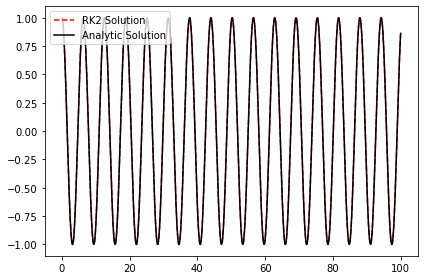

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 10000 # total number of time interval
total_time = 100. # seconds
t_arr = np.linspace(0,total_time,Nt+1)
x_arr = np.zeros(Nt+1)
v_arr = np.zeros(Nt+1)
h = total_time / Nt
omega = 1.0 # angular velocity 

x_arr[0] = 1. # meters
v_arr[0] = 0. # m/s


def ComputeK(x,v,h):
    fx = v
    fv = -omega**2.0 * x
    K_x = h * fx
    K_v = h * fv
    return [K_x, K_v]
    

for n in range(Nt):
    x_n = x_arr[n]
    v_n = v_arr[n]
    #=== Euler
    [K1_x, K1_v] = ComputeK(x_n,v_n,h)
    x_mid = x_n + 0.5 * K1_x
    v_mid = v_n + 0.5 * K1_v
    #==== RK2
    [K2_x, K2_v] = ComputeK(x_mid,v_mid,h)
    x_arr[n+1] = x_n + K2_x
    v_arr[n+1] = v_n + K2_v
    
    
plt.plot(t_arr, x_arr, '--r',label = 'RK2 Solution') 
plt.plot(t_arr, np.cos(omega * t_arr), '-k', label = 'Analytic Solution')
plt.legend(loc="upper left")
plt.tight_layout()
#plt.savefig("Unit5.2c_SHO_RK2.png")



## Inclass exercise: One-dim Mass-Spring-Damper Model 
---    
<font color='black'>
    
Consider a mass-spring-damper model:
$$m\ddot{x} = -kx -b \dot{x}$$
The mass of the object $m = 1\;\rm kg$, the damping coefficient $b = 2 \rm \; kg/s$, and the spring constant $k = 1 \rm \;kg/s^2$. The initial conditions are $x(0) = 10 \;\rm m$ and $v(0) = 0\;\rm m/s$. Please find $x(t)$ both **analytically** and **numerically** (Second order Runge-Kutta method, RK2) for the first 10 seconds. 
    


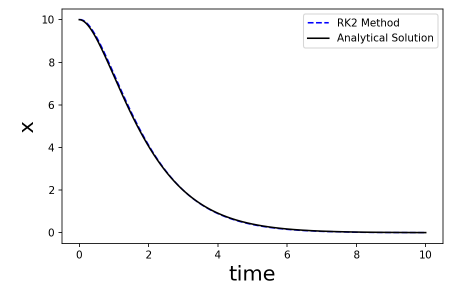




# Unit 5.3a: Time-dependent heat equation -- analytical solution



$$\frac{dT}{dt}=\alpha\frac{d^{2}T}{dx^{2}}-\beta\left(T-T_{air}\right)$$
- In week 9, we solved steady state solution of $T_{steady}$, which obeys

 $$0=\alpha\frac{d^{2}T}{dx^{2}}-\beta\left(T-T_{air}\right)$$

- Today, we will find the time evolution of $T(x,t)$

Let's consider a very simple scenario:

- $\alpha=1{\rm \;m^{2}/s}$, $\beta=0$, $L=1\;{\rm m}$
- B.C.s: $T\left(0\right)=T\left(L\right)=50^{\circ}{\rm C}$
- I.C. $T\left(x,t=0\right)=10\sin\left(\pi x\right)+50^{\circ}{\rm C}$



The possible solution of $T\left(x,t\right)$ for the heat equation is given by

$$T=T_{0}+\sum_{m=1,2,...}A_{m}\sin\left(\frac{m\pi}{L}x\right)e^{-\left(\frac{m\pi}{L}\right)^{2}\alpha t}+\sum_{m=1,2,...}B_{m}\cos\left(\frac{m\pi}{L}x\right)e^{-\left(\frac{m\pi}{L}\right)^{2}\alpha t}$$

Plugging all the boundary conditions and initial conditions, we have the solution 

$$T\left(x,t\right)=10\sin\left(\pi x\right)e^{-\pi^{2}t}+50^{\circ}{\rm C}$$

(i.e., $A_{1}=10$ and $A_{m=2,3,4,..}=B_{m=1,2,3,...}=0$)



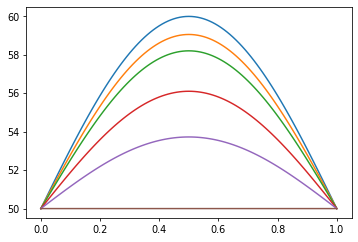

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.linspace(0,1,101)
t = 0.
T_arr = 10. * np.sin(np.pi * x_arr) * np.exp(- np.pi**2. * t) + 50.
fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(x_arr, T_arr)
#====
t = 0.01  
T_arr = 10. * np.sin(np.pi * x_arr) * np.exp(- np.pi**2. * t) + 50.
plt.plot(x_arr, T_arr)
#====
t = 0.02  
T_arr = 10. * np.sin(np.pi * x_arr) * np.exp(- np.pi**2. * t) + 50.
plt.plot(x_arr, T_arr)
#====
t = 0.05  
T_arr = 10. * np.sin(np.pi * x_arr) * np.exp(- np.pi**2. * t) + 50.
plt.plot(x_arr, T_arr)
#====
t = 0.1  
T_arr = 10. * np.sin(np.pi * x_arr) * np.exp(- np.pi**2. * t) + 50.
plt.plot(x_arr, T_arr)

#====
t = 1.
T_arr = 10. * np.sin(np.pi * x_arr) * np.exp(- np.pi**2. * t) + 50.
plt.plot(x_arr, T_arr)

---
# Unit 5.3b: Time-dependent heat equation -- Euler's solution
---
Euler's method:

$$\frac{dT}{dt}=f\left(t,T\right),\quad{\rm where}\;f=\alpha\frac{d^{2}T}{dx^{2}}$$

- $h_{x}$ step size for spatial discretization 

- $h_{t}$step size for time discretization 

$$f_{n,i}=\alpha\frac{T_{n,i-1}+T_{n,i+1}-2T_{n,i}}{h_{x}^{2}} $$

$$T_{n+1,i}=T_{n,i}+h_{t}f_{n,i} =  T_{n,i} + K_1$$



In [72]:
alpha = 1.0 #

Nx = 50 # number of grid points
total_time = 0.1 # seconds
Nt = 1000 # number of time intervals
#===
t_arr = np.linspace(0,total_time,Nt+1)
x_arr = np.linspace(0, 1, Nx+1)
T_arr = np.zeros([Nt+1, Nx+1])
#===
hx = 1./Nx
ht = total_time/Nt
gamma = alpha * ht/hx**2 
print ("gamma= %.2f"%gamma)



# Initial condition for temperature
T_arr[0, :] = 10. * np.sin(np.pi * x_arr)  + 50.

#==
for n in range(0,Nt):
    for i in range(1, Nx):
        T_n_left = T_arr[n,i-1]
        T_n_right = T_arr[n,i+1]
        T_n_i = T_arr[n,i]
        f_n_i = alpha * (T_n_left + T_n_right - 2. * T_n_i)/hx**2.
        # update T_arr
        T_arr[n+1,i] = T_arr[n,i] + ht * f_n_i
    # BC 
    T_arr[n+1,0] = 50. # left boundary
    T_arr[n+1,Nx] = 50. # right boundary 



        
#plt.plot(x_arr, T_arr[0,:],'--k*')
#plt.plot(x_arr, T_arr[500,:],'--g*')   
#plt.plot(x_arr, T_arr[1000,:],'--r*')
print ("okay")
    
    
%matplotlib
#=====
fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
for n in range(0,Nt+1):
    if n%500 == 0:
        time = ht * n
        plt.plot(x_arr, T_arr[n,:],'--*', label = 'time = %.2f s'%time) 
        T_analytic = 10. * np.sin(np.pi * x_arr) * np.exp(- np.pi**2. *time) + 50.
        plt.plot(x_arr, T_analytic,'k-', label = 'time = %.2f s'%time) 
        #plt.legend()
        #print (n)
          
    
    
    
    

gamma= 0.25
okay
Using matplotlib backend: QtAgg


gamma= 0.25
okay


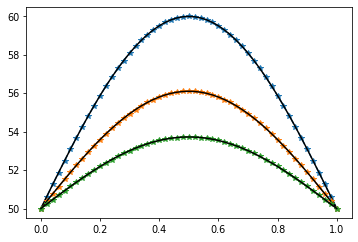

In [2]:
import numpy as np
import matplotlib.pyplot as plt


alpha = 1.0 #

Nx = 50 # number of grid points
total_time = 0.1 # seconds
Nt = 1000 # number of time intervals
#===
t_arr = np.linspace(0,total_time,Nt+1)
x_arr = np.linspace(0, 1, Nx+1)
T_arr = np.zeros([Nt+1, Nx+1])
#===
hx = 1./Nx
ht = total_time/Nt
gamma = alpha * ht/hx**2 
print ("gamma= %.2f"%gamma)



# Initial condition for temperature
#T_arr[0, :] = 10. * np.sin(np.pi * x_arr)  + 50.
T_arr[0, :] =  ?????

#==
for n in range(0,Nt):
    for i in range(1, Nx):
        T_n_left = T_arr[n,i-1]
        T_n_right = T_arr[n,i+1]
        T_n_i = T_arr[n,i]
        f_n_i = alpha * (T_n_left + T_n_right - 2. * T_n_i)/hx**2.
        # update T_arr
        T_arr[n+1,i] = T_arr[n,i] + ht * f_n_i
    # BC 
    T_arr[n+1,0] = ???? # left boundary
    T_arr[n+1,Nx] = ??? # right boundary 


print ("okay")
    

#=====
fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
for n in range(0,Nt+1):
    if n%500 == 0:
        time = ht * n
        plt.plot(x_arr, T_arr[n,:],'--*', label = 'time = %.2f s'%time) 
        T_analytic = 10. * np.sin(np.pi * x_arr) * np.exp(- np.pi**2. *time) + 50.
        #plt.plot(x_arr, T_analytic,'k-', label = 'time = %.2f s'%time) 
 
    
    
    
    


